In [1]:
from astropy.io import fits
from heeps.pupil.create_petal import create_petal
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
cube = fits.getdata('/Users/cdelacroix/INSTRUMENTS/METIS/heeps_analysis/input_files/wavefront/cube_Cbasic_20201130_3600s_300ms_0piston_meters_scao_only_285.fits')
nframes, npupil = cube.shape[:2]
print('nframes=%s, npupil=%s'%(nframes, npupil))

nframes=12000, npupil=285


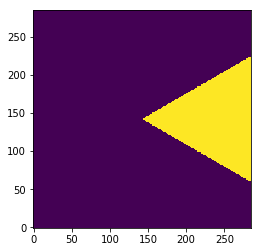

In [3]:
npetals = 6
petals = np.float32([create_petal(x, npetals, npupil) for x in range(npetals)])
imshow(petals[0], origin=True)


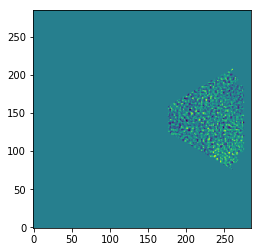

In [4]:
imshow(cube[0]*petals[0], origin=True)

## Calculate pistons in nm

In [5]:
pistons = np.empty((npetals, nframes))
for i, petal in enumerate(petals):
    print(i, end=', ')
    for j, frame in enumerate(cube):
        petal_frame = petal*frame*1e9
        mask = np.where(petal_frame != 0)[0]
        pistons[i,j] = np.mean(petal_frame[petal_frame != 0])
pistons.shape


0, 1, 2, 3, 4, 5, 

(6, 12000)

In [6]:
rms_pistons = np.std(pistons, axis=1)
mean_piston = np.mean(rms_pistons)
print('petal pistons (nm rms) = %s\nmean petal piston (nm rms) = %s'%(rms_pistons, mean_piston))

petal pistons (nm rms) = [17.6994327  17.46439528 17.38704479 17.70513046 17.46888291 17.3697709 ]
mean petal piston (nm rms) = 17.515776175104794


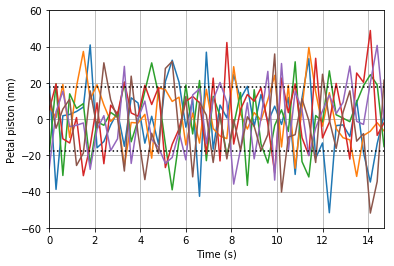

In [7]:
npts = 50
DIT = 300 # ms
x = np.arange(npts)*DIT/1000
plot(x, pistons.T[:npts])
axhline(mean_piston, color='k', linestyle=':')
axhline(-mean_piston, color='k', linestyle=':')
grid(True), grid(which='minor', linestyle=':')
xlabel('Time (s)')
ylabel('Petal piston (nm)')
xlim(0, x[-1])
ylim(-60, 60)
savefig('petal_piston_c-basic_CM13.png', transparent=True, dpi=300)